# **Investigating Dimensionality Reduction**

- In this notebook I have used dimensionality reduction (predominantly UMAP) to visualise the structure and separation of distinct stellar populations identified during the extreme deconvolution pipeline. Beyond simply visualisation, a key objective is to evaluate the feasibility of performing unsupervised clustering directly in the reduced dimensional space. Ie studying the ability of dimensionality reduction algorithm as isolating these clusters efficiently and the stability of this across hyperparamters.

This approach could offer two major advantages:
- Improved computational efficiency: 
    - Reducing the dimensionality of the data significantly accelerates Gaussian Mixture Models, Expectation Maximisation Algorithm which would allow them to be more scalable....
- Scalability to next-generation surveys: 
    - With the next gemeration of large-scale spectroscopic surveys on the horizon (eg. WEAVE and 4MOST), which will produce vast high-dimensional datasets and allow similiar analysis to datasets similiar to those in this analysis but on much greater scale.


## Clustering Algorthims: 
- In this notebook I apply two clustering algorthims to the low dimensional space 

### **Gaussian Mixture Models**

### **HDBSCAN**
- This additional method is chosen as:
    - Does not require prior information on the number of clusters, it may be able to indentify newer structures.
    - Naturally handels  clusters of varying densities and shapes
    - These is no reason these cluster in high dimensional distributions should be gaussian in structure
    - Robust at handelling outliers

In [1]:
from analysis import investigate_umap
from analysis import investigate_tsne

# Avoid warnings from umap for cleaner output
import warnings
warnings.filterwarnings("ignore")

## **Apogee** - 7 Gaussian Component Assignment

In [16]:
# Define your configuration
apogee_data_path = 'XD_Results/Apogee_postGMM/apogee_GMM_scaled_Gauss7_results.fits'
apogee_data_keys = ['fe_h', 'alpha_m', 'E_50', 'ce_fe', 'al_fe', 'mg_mn']

apogee_labels_name = {
    1: "GS/E 1",
    6: "GS/E 2",
    3: "Splash",
    7: "Aurora",
    2: "Eos",
    5: "Back 1",
    4: "Back 2"
}

apogee_labels_color_map = {
    "GS/E 1": "green",
    "GS/E 2": "darkorange",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Back 1": "cyan",
    "Back 2": "lightskyblue"
}

In [11]:
?investigate_umap

Signature:
investigate_umap(
    table_path,
    data_keys,
    label_column,
    labels_name,
    labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method=None,
    n_components_gmm=5,
    min_cluster_size_hdbscan=30,
    min_samples_hdbscan=1,
    axis_label_fontsize=14,
    tick_fontsize=13,
    title_fontsize=19,
    legend_fontsize=13,
)
Docstring:
Visualizes UMAP dimensionality reduction results for a high-dimensional dataset and 
optionally applies clustering (GMM or HDBSCAN) in the reduced space.

Parameters
----------
table_path : str
    Path to the FITS file containing the dataset.
data_keys : list of str
    List of column names to use as input features for UMAP.
label_column : str
    Column name containing original cluster assignments for coloring true label plots.
labels_name : dict
    Dictionary mapping numerical cluster IDs to string labels (e.g. {1: 'GS/E', 2: 'Splash'}).
labels_color_map : dict
    Dictionary mapping s

## UMAP

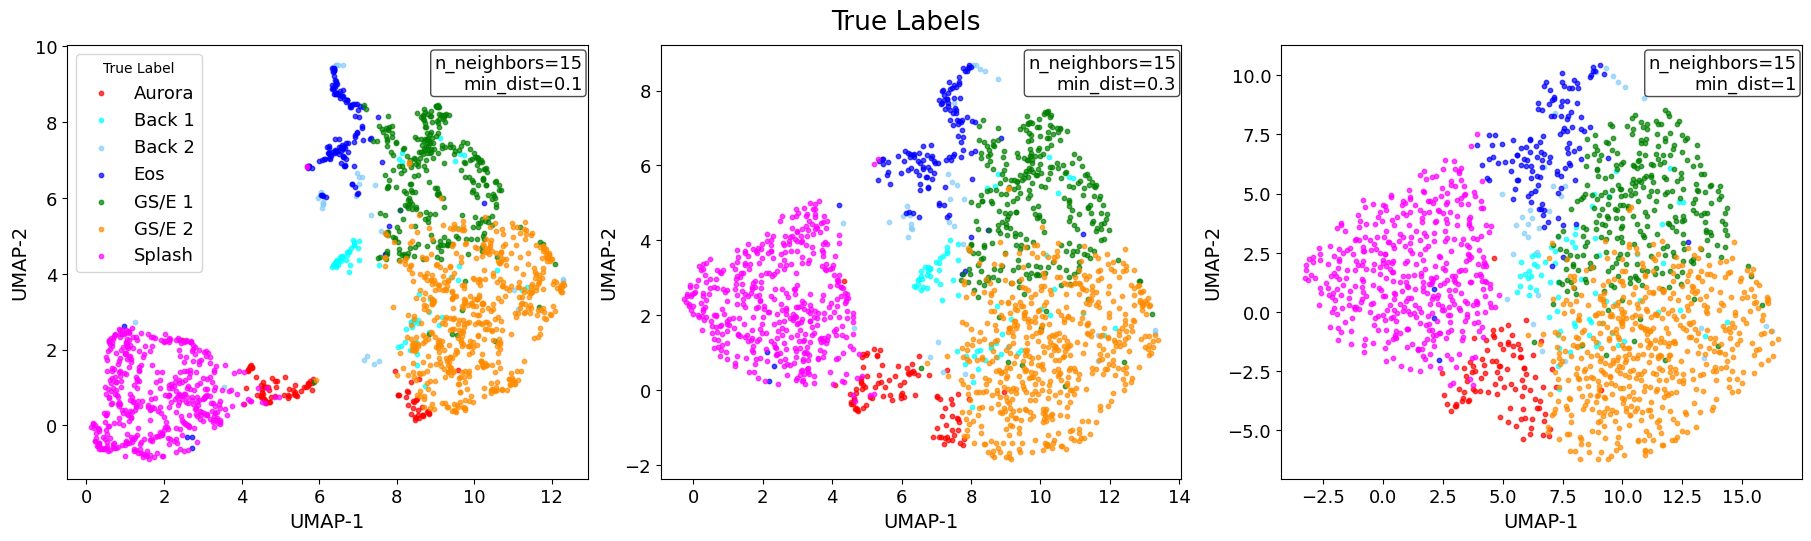

In [17]:
investigate_umap(
    table_path=apogee_data_path,
    data_keys=apogee_data_keys,
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method=None,
)

## Insight into APOGEE clusters distribution from lower dimensional (UMAP) mapping:
- Here we can see the distinct seperation of clusters
- However more intresting we can see the stability of populations over the min_dist hyperparameter:


| `min_dist` Value | Effect                                   | Benefit                                                  |
|------------------|----------------------------------------------------------|------------------------------------------------------------|
| **Low**   | Prioritises local structure** | Good for visualising how distinct cluster are in space|
| **High** | Priotises global structure | Good for preserving overall data ditribution and interaction between clusters|

* **Expected results:**
    - The intertwined nature of the GS/E 1 and GS/E 2 at all min dim due to the fitting of two gaussians to the overall structure (intersecting earlier and older population of dwarf galaxy)

* **Intresting result:**
    - We see that the Aurora population is split and almost acts like a bridge between the Splash and Low Metalility GS/E 2 populations suggesting these is insufficient data dimensions to allow reliable independence of the cluster. 
    - This supports the observation that in the APOGEE data the Aurora population was the first to be lost as we went from 7 to 5 gaussian components.


## TSNE
- Simply shown for visulisation purposes

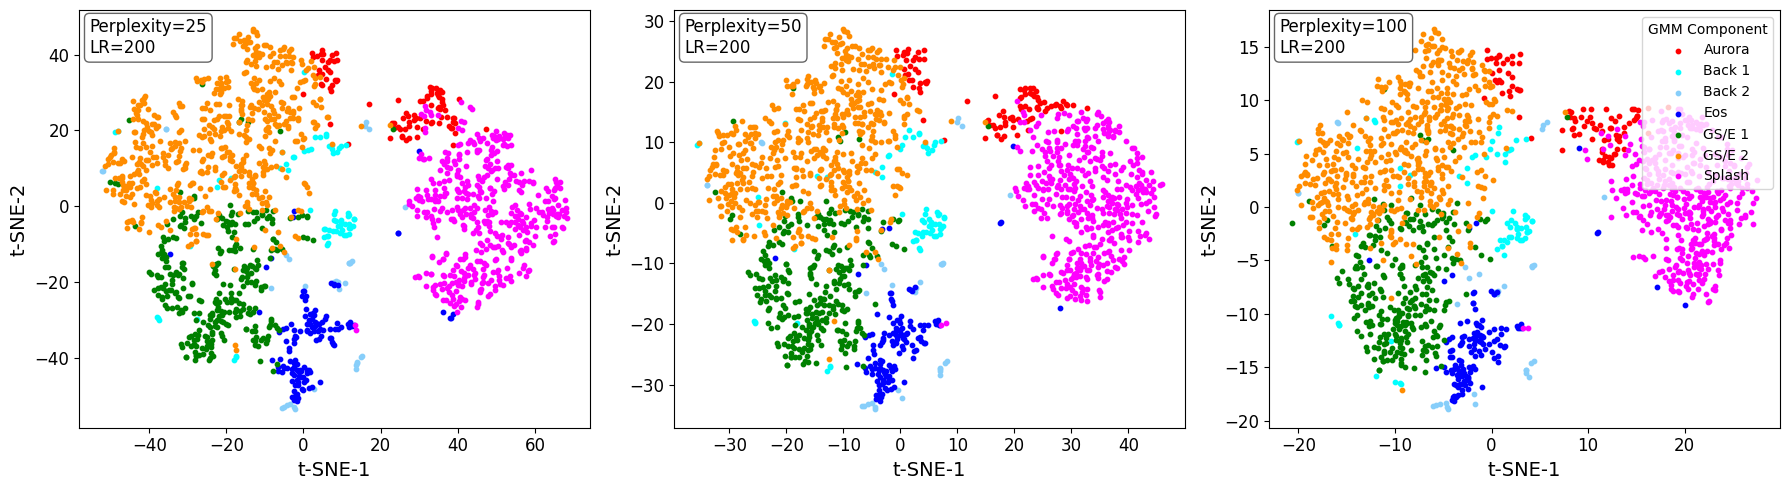

In [ ]:
investigate_tsne(
    table_path=apogee_data_path,
    data_keys=['fe_h', 'alpha_m', 'E_50', 'ce_fe', 'al_fe', 'mg_mn'],
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    perplexities=[25, 50, 100],
    learning_rates=[200, 200, 200],
)

## Trying to recreate clusters in this space - GMM:
- Here we apply a simply Gaussian Mixture Model to investigate the feasibility of applying clustering algorithms to this space, due to the lack of clear seperation, we see poor results from the GMM, showing little promise when using only the 6 dimensional space that was applied in the analysis. 

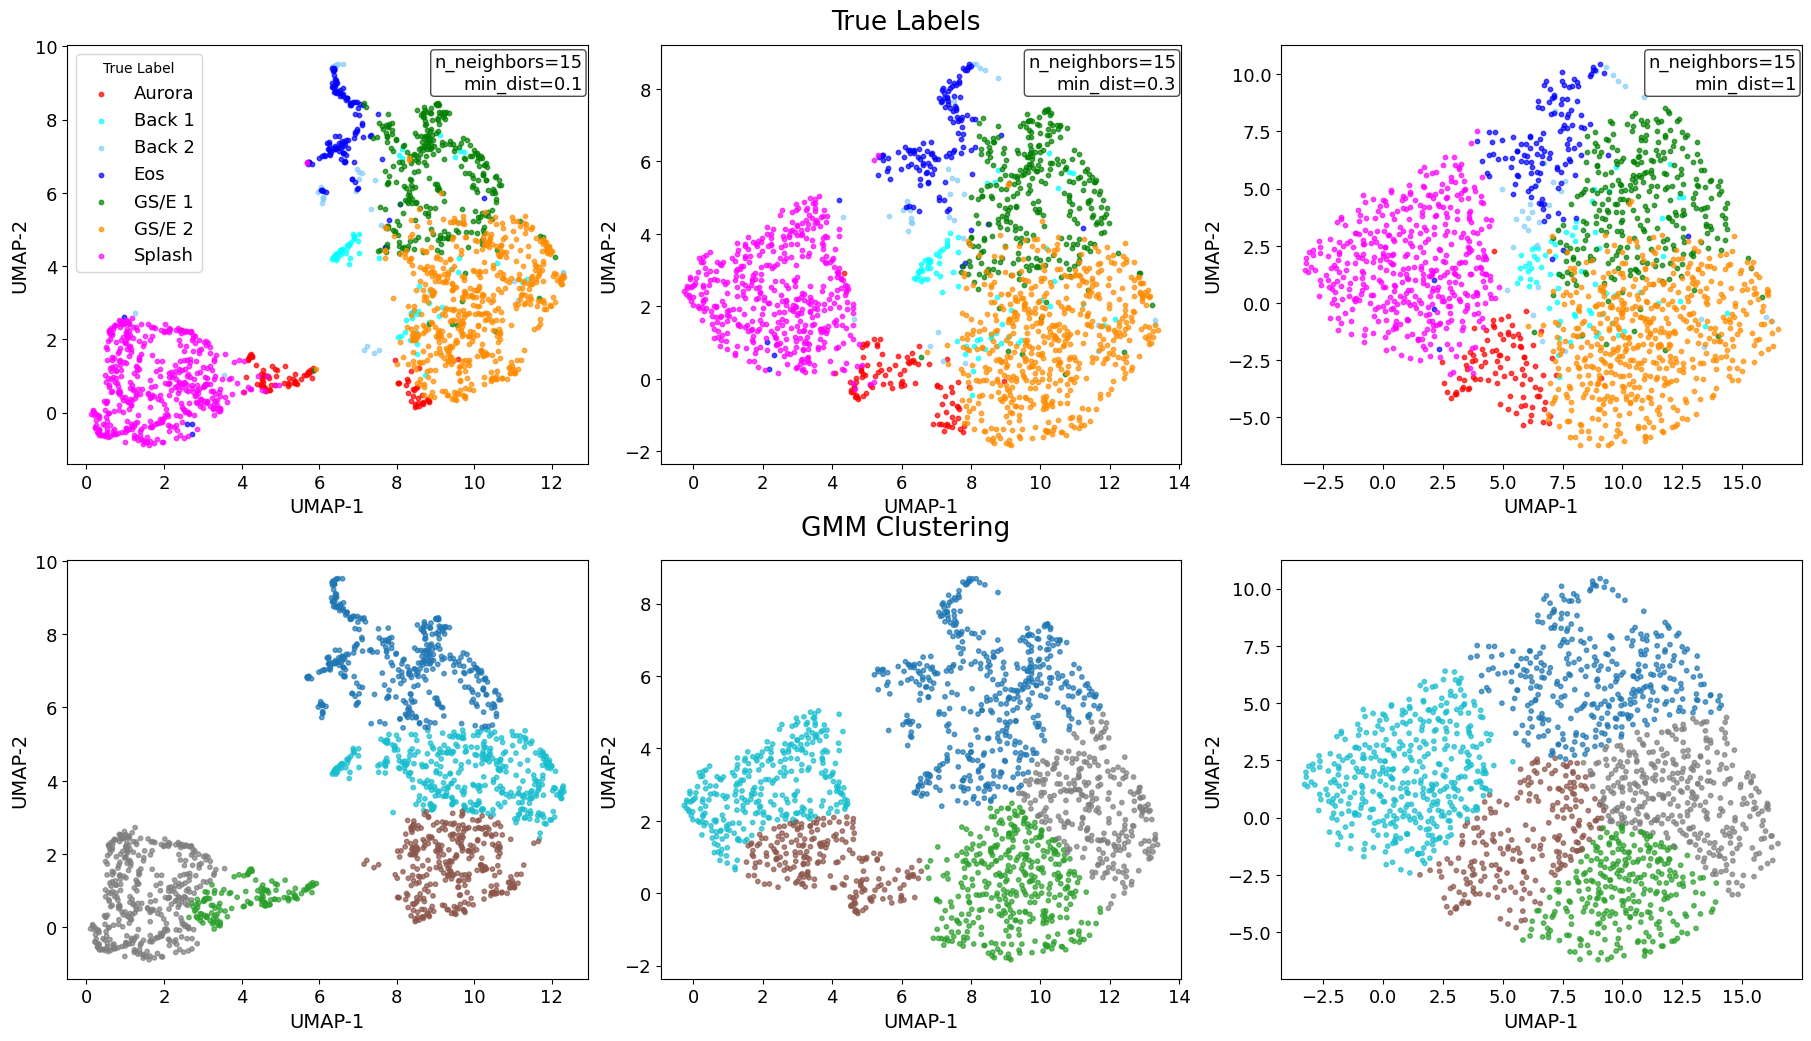

In [13]:
investigate_umap(
    table_path=apogee_data_path,
    data_keys=apogee_data_keys,
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method='GMM',
    n_components_gmm=5
)

## **HDBSCAN Investigation on this space:**
- Although a range of hyperparameter combinations were selected, these have showed poor results

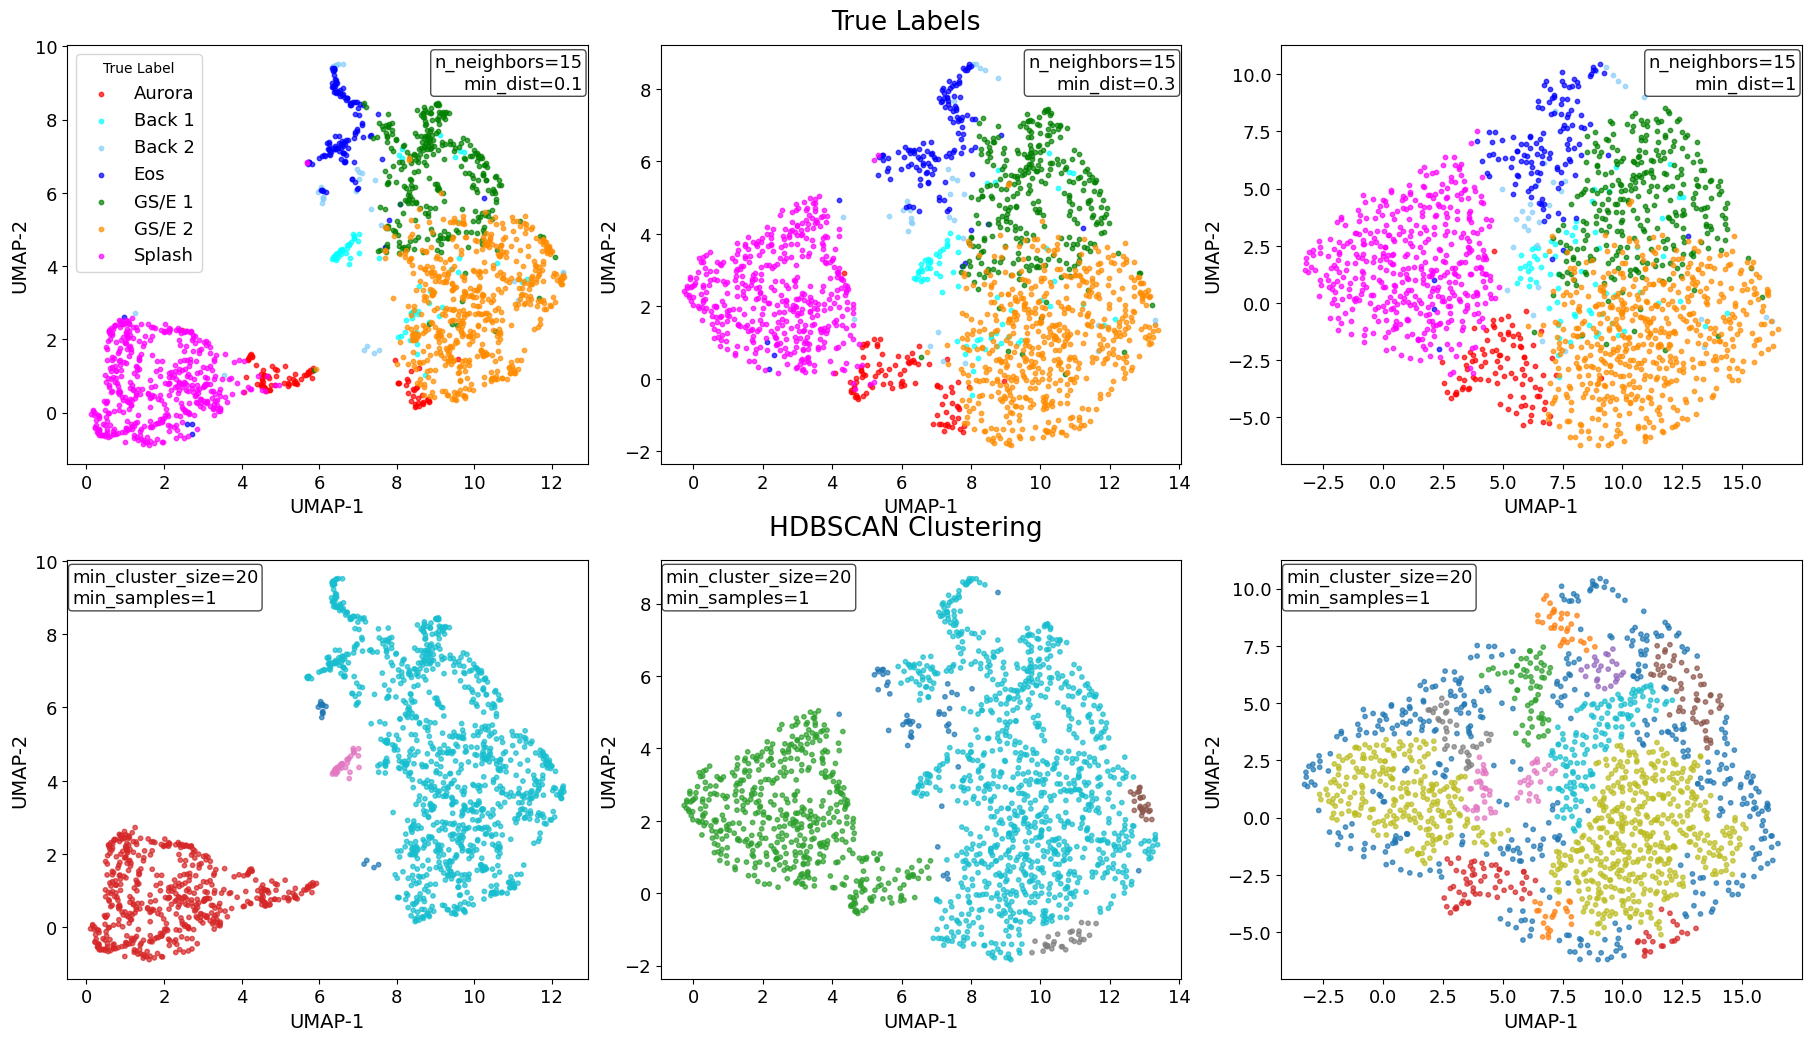

In [7]:
investigate_umap(
    table_path=apogee_data_path,
    data_keys=apogee_data_keys,
    label_column = 'max_gauss',
    labels_name=apogee_labels_name,
    labels_color_map=apogee_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method='HDBSCAN',
    min_cluster_size_hdbscan=20,
    min_samples_hdbscan=1,
)

## GALAH - 5 Gaussian Component Assignment

In [8]:
# Define your configuration
galah_data_path = 'XD_Results/Galah_postGMM/Galah_GMM_scaled_Gauss5_results.fits'
galah_data_keys = ['fe_h', 'alpha_fe', 'Na_fe', 'Al_fe', 'Mn_fe', 'Y_fe', 'Ba_fe', 'Eu_fe', 'Mg_Cu', 'Mg_Mn', 'Ba_Eu', 'Energy']

galah_labels_name = {
    4: "GS/E",
    2: "Splash",
    1: "Aurora",
    5: "Eos",
    3: "Background",
}

galah_labels_color_map = {
    "GS/E": "green",
    "Splash": "magenta",
    "Aurora": "red",
    "Eos": "blue",
    "Background": "lightskyblue"
}

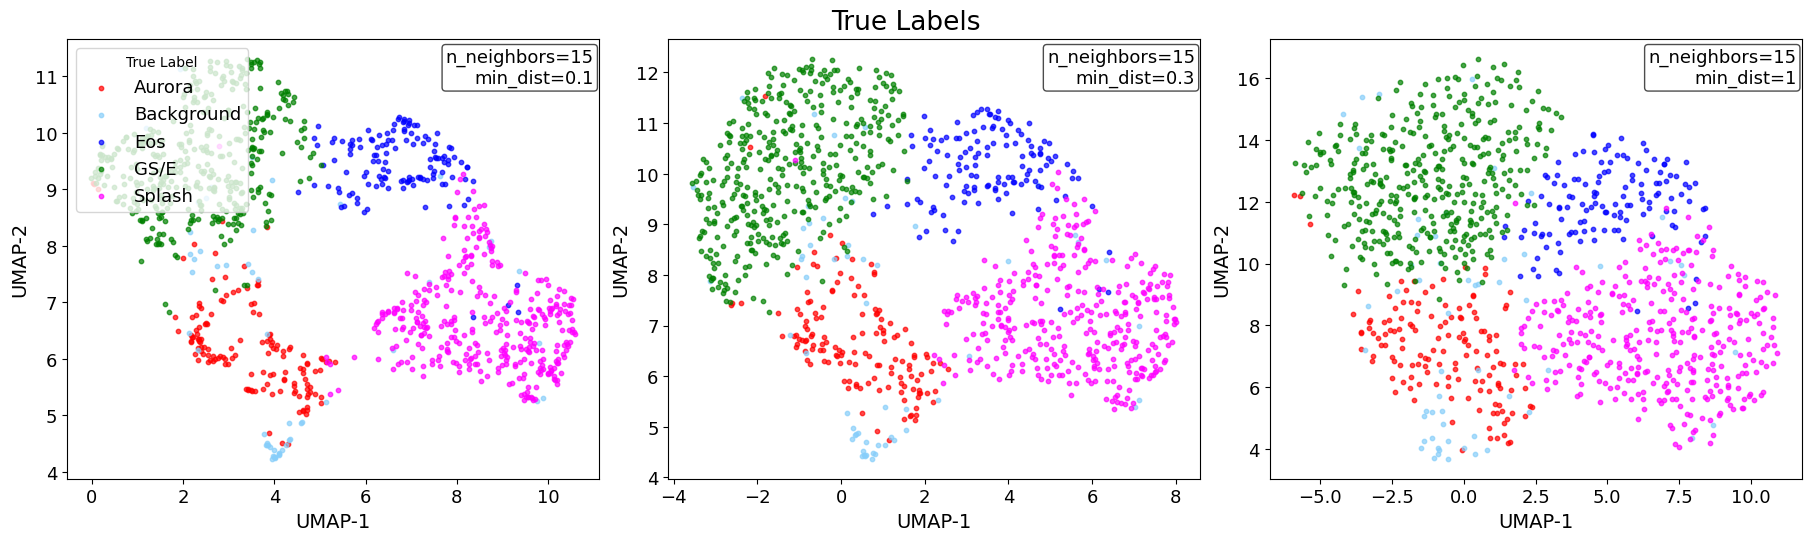

In [9]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method=None,
)

- Despite the caveats of Galah:
    - its focus on main sequence turn off stars
    - its smaller sample size in these cuts
    - its reduced view of low metalticity stars
    - etc

- We show that using Galah's larger number of chemical abundances, we have actually been more successful in isolating these 4 indpendent populations and they are clearly seperated at both low and high `min_dist` hyperparameters. 
- These shoes both globally and locally they are better isolated.
- And leads to more promise when applying clustering algorthims to this space ... shown below

## Recovering the results using GMM on lower dimensional space 
- Overwhelmingly positive results at achieving all 4 dimensions that were originally selected from GMM
- From visual inspection we see great matches between the high dimensional XD algorithms designated clustering and the low dimensional UMAP clustering algorithms
- This leads to a greater investigation of the true agreement in higher dimensional space in `Noteook_5`.
- We also further extend this below be investigating ... what happens if we increase it beyond the number of meaningful components found by Galah. 
- We previously showed in Notebook 2 that in the full dimension space Galah was unable to identify the independent GS/E 1 and GS/E 2 populations ... but maybe we can in lower dimensional space !

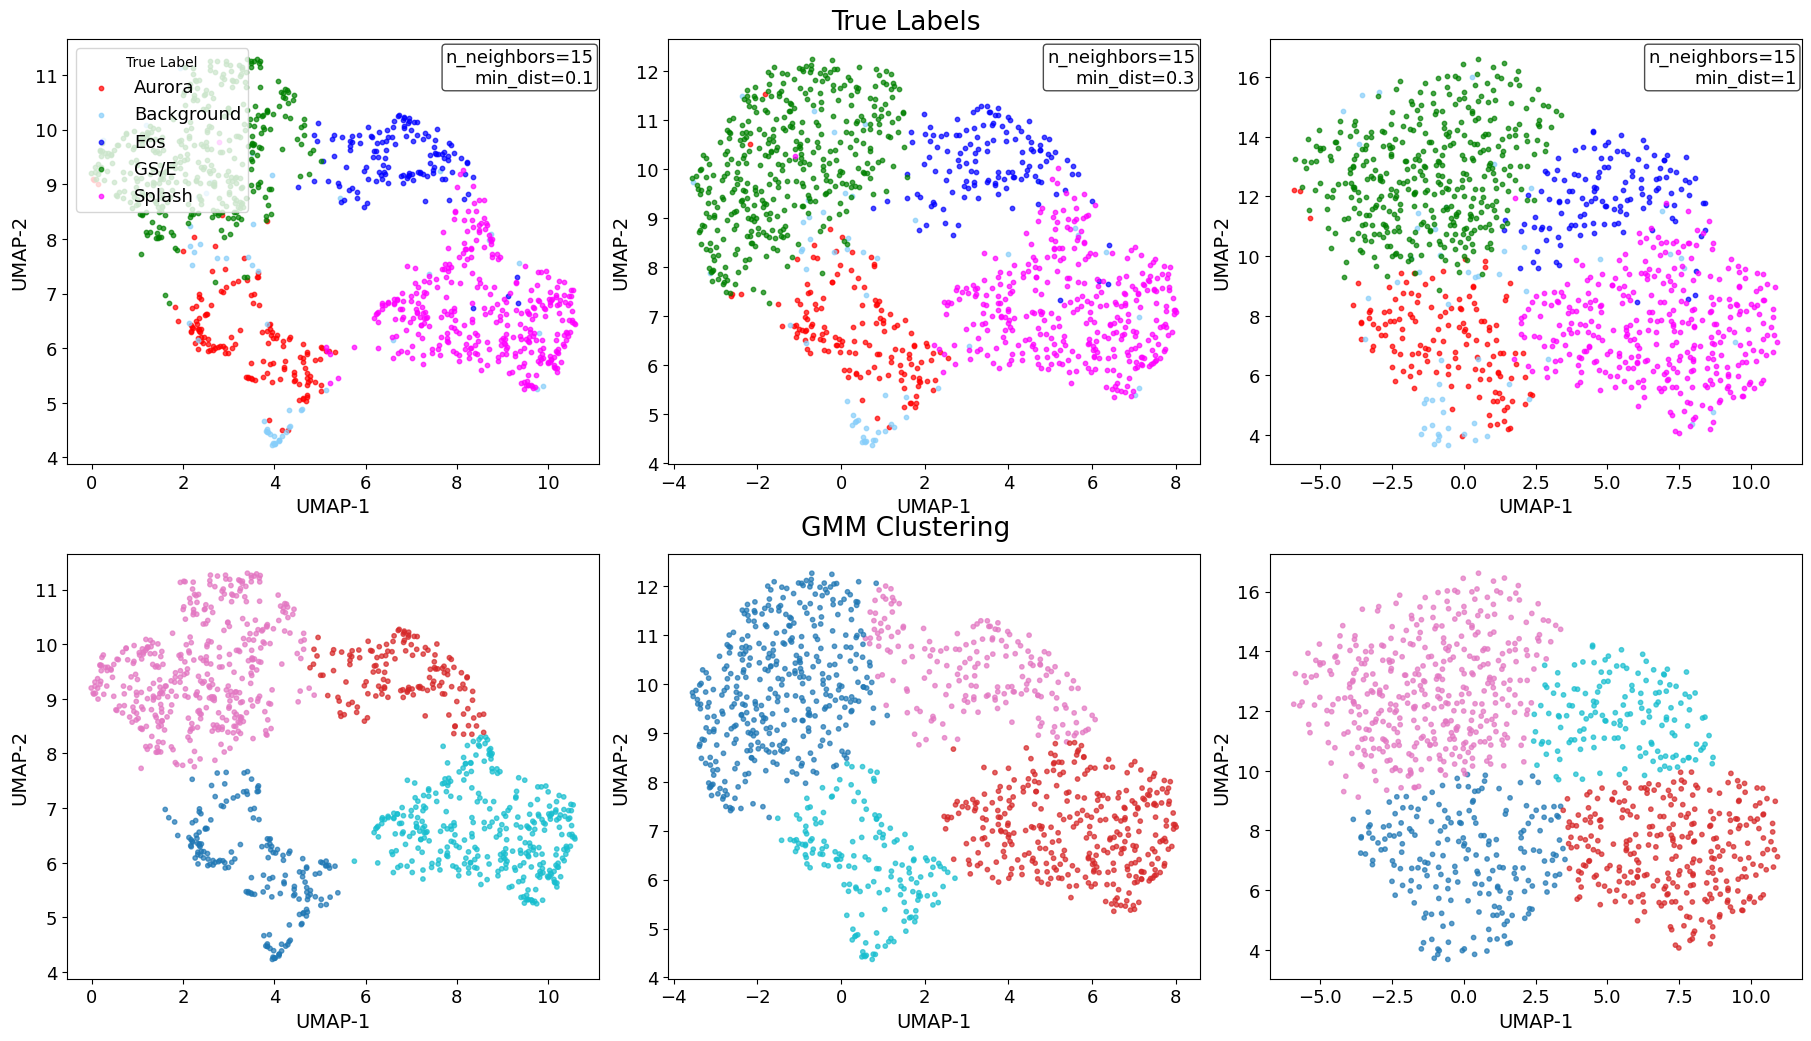

In [10]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method='GMM',
    n_components_gmm=4
)

## What about finding more components - ie 5
- In the GMM galah showed that adding further components simply added more background noise components but what about in this lower dimensional space
- We seem to split the GS/E section into two need componets similiar to as done in the apogee, could this be the plataeu and the knee
- To show this rigurously and verify what these populations show, we will need to project back to original dimension space and determine 2D projections manually.

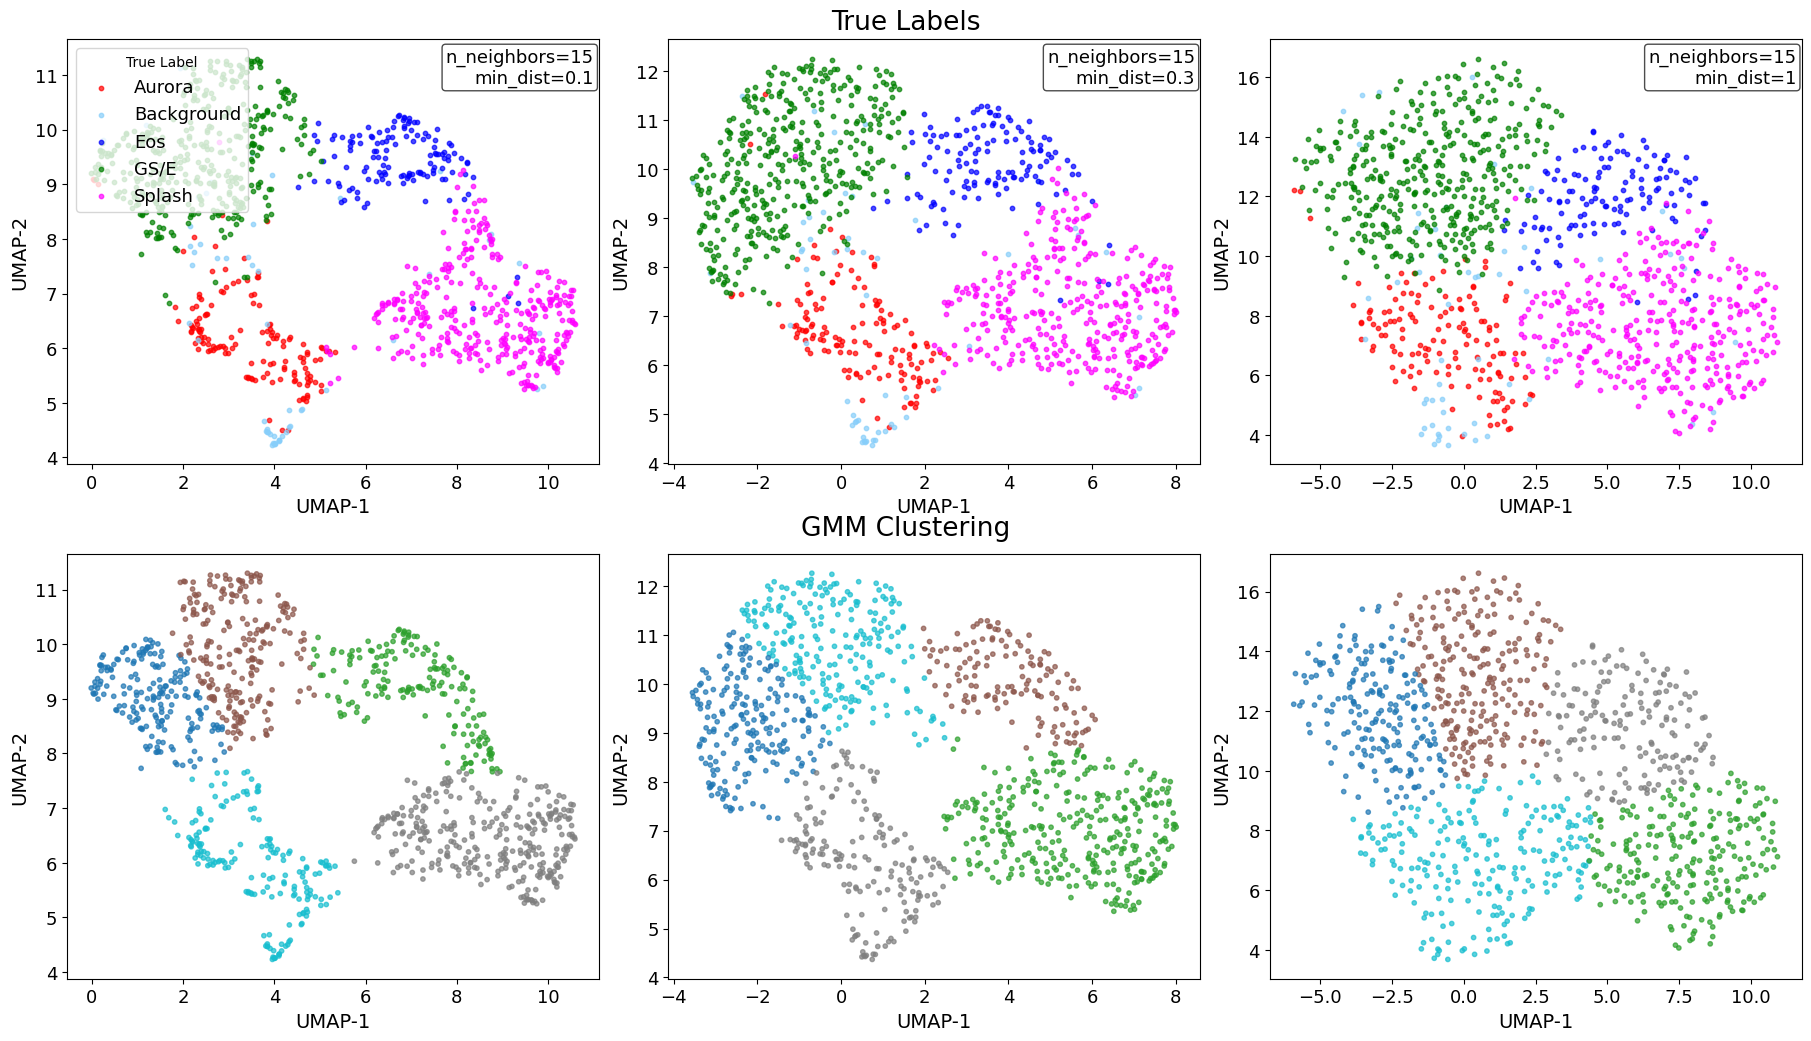

In [13]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method='GMM',
    n_components_gmm=5
)

## **HDBSCAN Investigation on this space:**
- Although a range of hyperparameter combinations were selected, these have showed poor results
- For both Apogee and Galah datasets these showed poor results and thus are not further investigated.

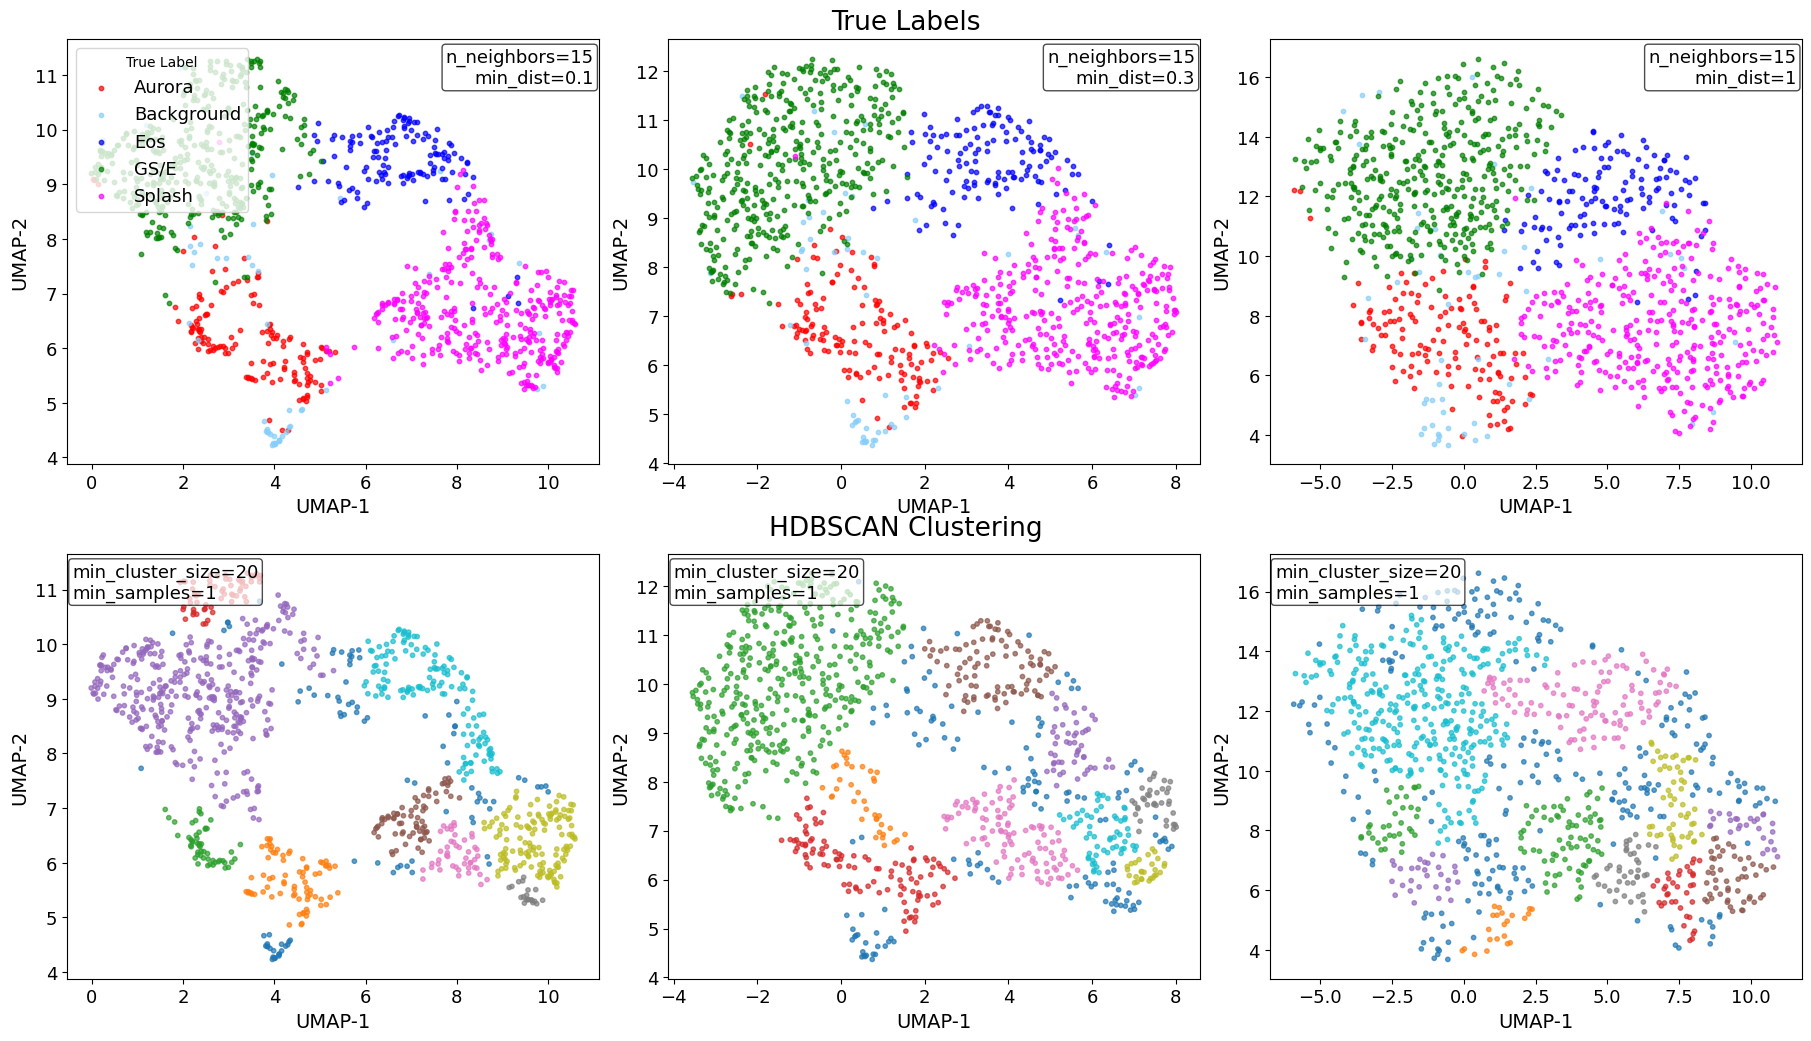

In [12]:
investigate_umap(
    table_path=galah_data_path,
    data_keys=galah_data_keys,
    label_column = 'max_gauss',
    labels_name=galah_labels_name,
    labels_color_map=galah_labels_color_map,
    n_neighbors_list=[15, 15, 15],
    min_dist_list=[0.1, 0.3, 1],
    cluster_method='HDBSCAN',  # Accepts 'GMM', 'HDBSCAN', or None
    min_cluster_size_hdbscan=20,
    min_samples_hdbscan=1,
)